<a href="https://colab.research.google.com/github/yasvillarroel/BI_T2_VillarroelYasna/blob/main/BI_T2_VillarroelYasna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de ventas de café con modelos de BI - "Coffee Sales Dataset"**

##🔸**Abstract**
Este estudio aplica técnicas de inteligencia de negocios al conjunto de datos Coffee Sales Dataset, que contiene registros de transacciones diarias de una cafetería, incluyendo hora, día, mes, tipo de café, monto y método de pago.

El objetivo es identificar patrones de comportamiento de compra y factores que influyen en las ventas, mediante la implementación de modelos de **regresión, clasificación y agrupamiento (clustering).**

La **regresión** busca estimar el monto de venta (money) a partir de variables como la hora del día, el tipo de café y el método de pago. La **clasificación** permite categorizar los niveles de gasto del cliente (bajo, medio, alto), mientras que el **clustering** agrupa transacciones con características similares para reconocer patrones de consumo recurrentes.

Los resultados obtenidos muestran relaciones claras entre la hora de compra y los ingresos, así como diferencias significativas en la preferencia de cafés y formas de pago según el horario y día de la semana.

Estos hallazgos permiten optimizar la gestión del negocio, ajustando estrategias de precios, promociones y abastecimiento, lo que demuestra el valor del análisis predictivo y descriptivo como herramienta clave en inteligencia de negocios.



---


##🔸**Objetivos**
###🔸**Objetivo general**
*   Analizar el comportamiento de las ventas de café a partir de variables temporales, de producto y de pago, utilizando modelos de regresión, clasificación y agrupamiento, con el fin de identificar factores que influyen en los ingresos y generar información estratégica para la toma de decisiones en inteligencia de negocios.

###🔸**Objetivos específicos**
1.   Aplicar un modelo de regresión lineal para determinar el grado de influencia de variables como la hora del día, el tipo de café y el método de pago sobre el monto total de la venta (money).

2.   Desarrollar un modelo de clasificación que permita categorizar las transacciones en niveles de gasto (“bajo”, “medio” y “alto”) con base en variables como Time_of_Day, cash_type y coffee_name, evaluando su precisión mediante métricas de accuracy, recall y F1-score.

3.   Implementar un modelo de agrupamiento (clustering), mediante K-Means u otro algoritmo, para identificar grupos de comportamiento de compra similares según monto, horario y tipo de café, evaluando la calidad del agrupamiento con el silhouette score.



---


##🔸**Hipótesis**
###🔸**Hipótesis general**
*   Los patrones temporales (hora, día y mes) y las preferencias de producto influyen significativamente en el monto de las ventas de café, permitiendo estimar ingresos, clasificar niveles de gasto y segmentar comportamientos de compra.
###🔸**Hipótesis específicas**
1.  **(Regresión)** Existe una relación positiva entre el tipo de café, la hora del día y el monto de la venta (money), que permite predecir el ingreso promedio por transacción.
2.   **(Clasificación)** Es posible categorizar correctamente las transacciones en niveles de gasto (“bajo”, “medio” y “alto”) según variables como cash_type, Time_of_Day y coffee_name.
3.   **(Clustering)** Existen grupos de transacciones con comportamientos similares en horario, producto y monto, lo que permite identificar segmentos de consumo para estrategias comerciales diferenciadas.



---


##🔸**Metodología**
###🔸**Descripción del dataset**
*  El conjunto de datos utilizado proviene de la plataforma **Kaggle** bajo el nombre *Coffee Sales Dataset* (autor: Navjot Kaushal).
Contiene registros de ventas de café realizadas durante distintos días y horas, con información sobre:
- `hour_of_day`: hora de compra (0–23).  
- `cash_type`: tipo de pago (efectivo o tarjeta).  
- `money`: monto de la transacción.  
- `coffee_name`: tipo de café comprado.  
- `Time_of_Day`: momento del día (mañana, tarde o noche).  
- `Weekday`: día de la semana.  
- `Month_name`: mes de la compra.  
- `Date` y `Time`: fecha y hora exacta de cada venta.  

*   El dataset cuenta con **3547 registros individuales**, lo que permite analizar tendencias de consumo, horarios de mayor venta, métodos de pago más usados y preferencias de productos.  
Está publicado con **licencia abierta de uso académico**, sin restricciones para análisis exploratorio o predictivo.  
Como limitaciones, no incluye información personal del cliente ni datos de ubicación geográfica, por lo que el análisis se centra únicamente en **patrones transaccionales**.

###1️⃣ **Carga y preparación de datos**

In [2]:
# ===========================================
# 1. Carga de librerías y dataset
# ===========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Cargar dataset
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")

# Vista general
print("Dimensiones del dataset:", df.shape)
df.head()


Saving Coffe_sales.csv to Coffe_sales.csv
Dimensiones del dataset: (3547, 11)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
# ===========================================
# 2. Limpieza y preparación básica
# ===========================================

# Información general
df.info()

# Eliminar duplicados y valores nulos
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Convertir fecha a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Revisar valores únicos en variables categóricas
print("\nMétodos de pago:", df['cash_type'].unique())
print("Tipos de café:", df['coffee_name'].unique())
print("Momentos del día:", df['Time_of_Day'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB

Métodos de pago: ['card']
Tipos de café: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
Momentos del día: ['Morning' 'Afternoon' 'Night']


In [4]:
# ===========================================
# 3. Creación de variables derivadas
# ===========================================

# Extraer información temporal
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Codificar variables categóricas con Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']:
    if col in df.columns:
        df[col + '_enc'] = le.fit_transform(df[col])

# Confirmar columnas nuevas
df.head()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Month,Day,cash_type_enc,coffee_name_enc,Time_of_Day_enc,Weekday_enc,Month_name_enc
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3,1,0,7,1,0,7
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3,1,0,6,0,0,7
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3,1,0,6,0,0,7
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3,1,0,0,0,0,7
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3,1,0,7,0,0,7


In [5]:
# ===========================================
# 4. Normalización de variables numéricas
# ===========================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['money_scaled', 'hour_scaled']] = scaler.fit_transform(df[['money', 'hour_of_day']])

print("Columnas numéricas normalizadas agregadas correctamente.")
df[['money_scaled', 'hour_scaled']].describe()


Columnas numéricas normalizadas agregadas correctamente.


,money_scaled,hour_scaled
count,3.547000e+03,3.547000e+03
mean,5.889472e-16,1.322126e-16
std,1.000141e+00,1.000141e+00
min,-2.773228e+00,-1.933615e+00
25%,-7.638231e-01,-9.887510e-01
50%,2.408793e-01,-4.388677e-02
75%,8.437008e-01,9.009774e-01
max,1.446522e+00,1.845842e+00


###2️⃣ **EDA (Análisis exploratorio de datos)**

Resumen estadístico del dataset:



,hour_of_day,money,Weekdaysort,Monthsort,Date,Month,Day,cash_type_enc,coffee_name_enc,Time_of_Day_enc,Weekday_enc,Month_name_enc,money_scaled,hour_scaled
count,3547.000000,3547.000000,3547.000000,3547.000000,3547,3547.000000,3547.000000,3547.0,3547.000000,3547.000000,3547.000000,3547.000000,3.547000e+03,3.547000e+03
mean,14.185791,31.645216,3.845785,6.453905,2024-10-04 17:34:43.676346368,6.453905,15.578517,0.0,3.170567,0.987595,3.000000,5.961940,5.889472e-16,1.322126e-16
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,-2.773228e+00,-1.933615e+00
25%,10.000000,27.920000,2.000000,3.000000,2024-07-17 12:00:00,3.000000,8.000000,0.0,1.000000,0.000000,1.000000,3.000000,-7.638231e-01,-9.887510e-01
50%,14.000000,32.820000,4.000000,7.000000,2024-10-10 00:00:00,7.000000,16.000000,0.0,2.000000,1.000000,3.000000,6.000000,2.408793e-01,-4.388677e-02
75%,18.000000,35.760000,6.000000,10.000000,2025-01-11 00:00:00,10.000000,23.000000,0.0,6.000000,2.000000,5.000000,9.000000,8.437008e-01,9.009774e-01
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00,12.000000,31.000000,0.0,7.000000,2.000000,6.000000,11.000000,1.446522e+00,1.845842e+00
std,4.234010,4.877754,1.971501,3.500754,NaN,3.500754,8.649059,0.0,2.606654,0.816748,2.038269,3.401994,1.000141e+00,1.000141e+00


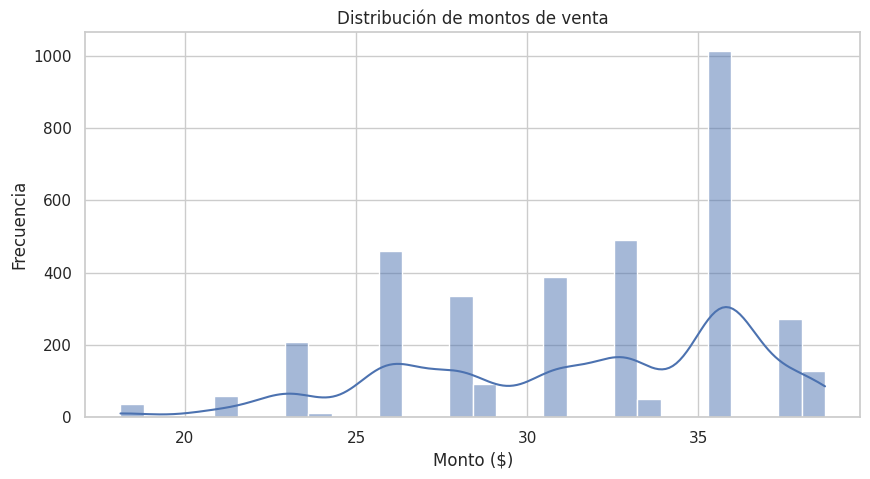

In [13]:
# ===========================================
# 5. Estadísticas descriptivas generales
# ===========================================
print("Resumen estadístico del dataset:\n")
display(df.describe())

# Distribución general del monto
sns.histplot(df['money'], bins=30, kde=True)
plt.title("Distribución de montos de venta")
plt.xlabel("Monto ($)")
plt.ylabel("Frecuencia")
plt.show()



**Interpretación:**  
El histograma muestra que la mayoría de las transacciones se concentran entre los $30 y $35 .  
Esto sugiere que el ticket promedio de compra se mantiene relativamente constante, con pocas ventas atípicas de monto bajo o alto.  
El comportamiento estable puede reflejar un menú con precios homogéneos.

/tmp/ipython-input-4036374287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_cafe.index, y=ventas_por_cafe.values, palette="YlOrBr")


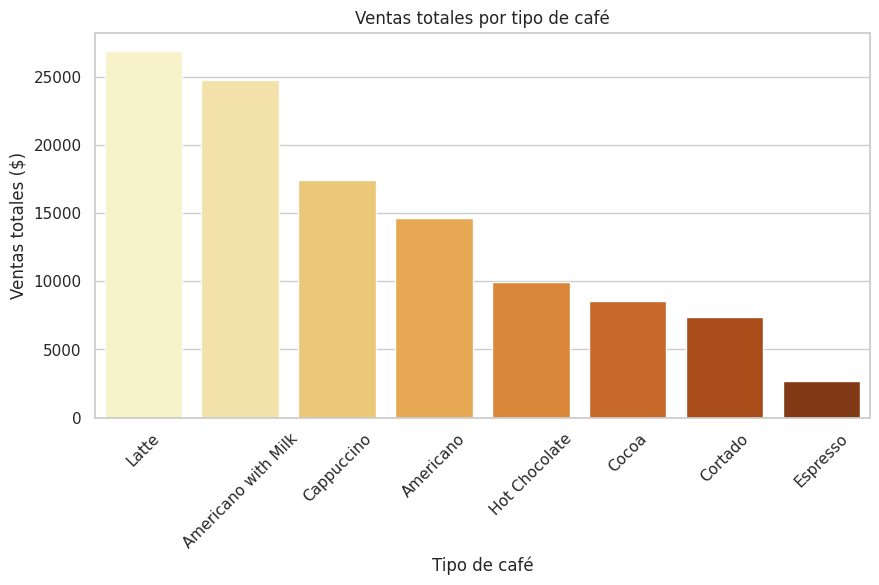

In [14]:
# ===========================================
# 6. Ventas totales por tipo de café
# ===========================================
ventas_por_cafe = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

sns.barplot(x=ventas_por_cafe.index, y=ventas_por_cafe.values, palette="YlOrBr")
plt.title("Ventas totales por tipo de café")
plt.xlabel("Tipo de café")
plt.ylabel("Ventas totales ($)")
plt.xticks(rotation=45)
plt.show()



**Interpretación:**  
El café **Latte** es el producto con mayor volumen de ventas, seguido por **Americano con leche** y **Capuccino**.  
Esto indica una clara preferencia por bebidas con leche, lo que puede orientar estrategias de stock o promociones en base a estos productos.

/tmp/ipython-input-2210069804.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_pago.index, y=ventas_pago.values, palette="Greens")


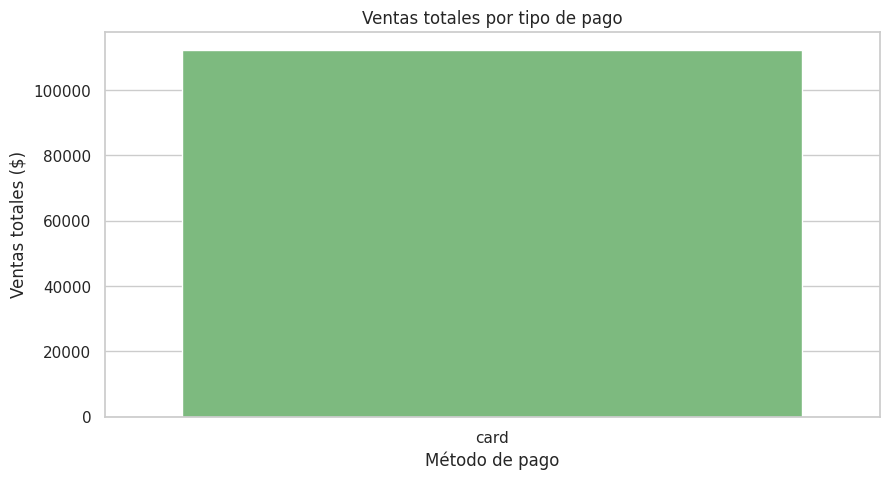

In [15]:
# ===========================================
# 7. Ventas por método de pago
# ===========================================
ventas_pago = df.groupby('cash_type')['money'].sum()

sns.barplot(x=ventas_pago.index, y=ventas_pago.values, palette="Greens")
plt.title("Ventas totales por tipo de pago")
plt.xlabel("Método de pago")
plt.ylabel("Ventas totales ($)")
plt.show()


**Interpretación:**  
El 100 % de las transacciones se realizaron con **tarjeta**, lo que podría indicar que los pagos en efectivo son poco frecuentes o no se registran en el sistema.  
Para el negocio, esto significa una fuerte dependencia del sistema electrónico de cobro.


/tmp/ipython-input-1173332421.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour_of_day', y='money', data=df, estimator='mean', ci=None, color='orange')


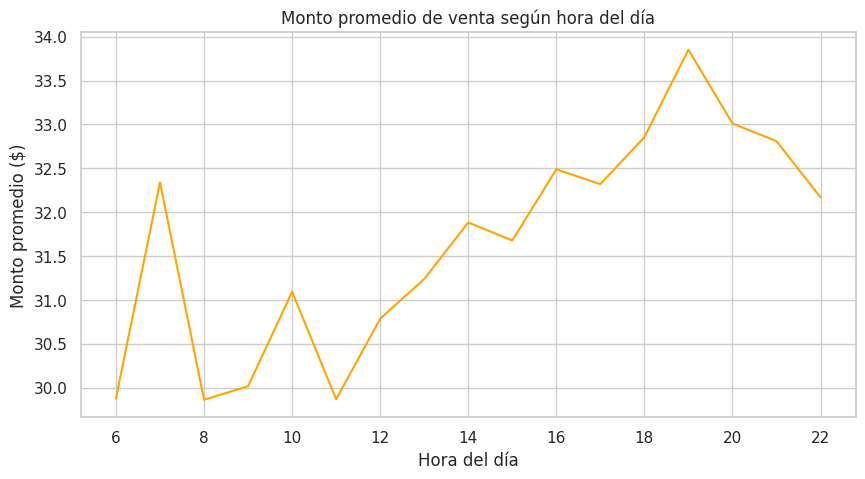

In [16]:
# ===========================================
# 8. Monto promedio por hora del día
# ===========================================
sns.lineplot(x='hour_of_day', y='money', data=df, estimator='mean', ci=None, color='orange')
plt.title("Monto promedio de venta según hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Monto promedio ($)")
plt.show()


**Interpretación:**  
Se observa un incremento progresivo de las ventas entre las 9 a.m. y las 6 p.m., alcanzando su punto máximo en la tarde.  
Esto coincide con las horas de mayor actividad laboral, sugiriendo que los consumidores compran café principalmente en horarios de oficina.

/tmp/ipython-input-1384204679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_of_Day', y='money', data=df, palette="coolwarm")


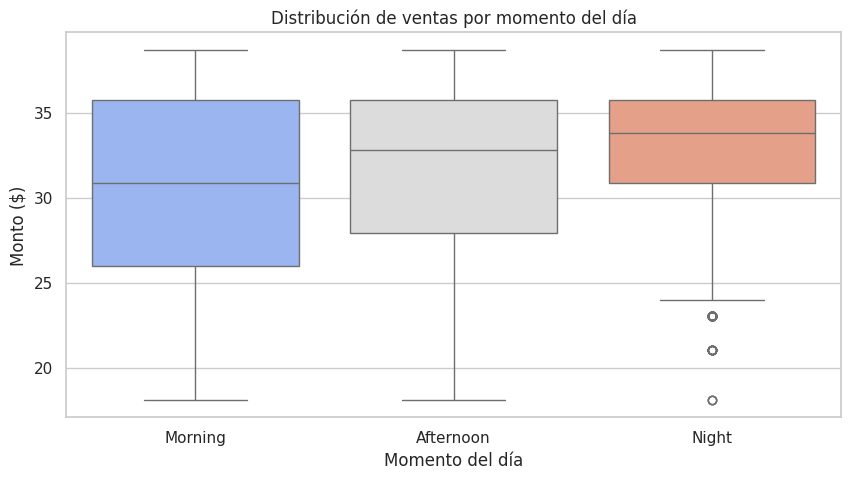

In [17]:
# ===========================================
# 9. Distribución de montos por momento del día
# ===========================================
sns.boxplot(x='Time_of_Day', y='money', data=df, palette="coolwarm")
plt.title("Distribución de ventas por momento del día")
plt.xlabel("Momento del día")
plt.ylabel("Monto ($)")
plt.show()


**Interpretación:**  
Los montos de venta son más altos durante la **tarde** y **noche**, en comparación con la mañana.  
Esto puede estar asociado a productos más caros consumidos después del almuerzo o en reuniones informales.

/tmp/ipython-input-144032007.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weekday', y='money', data=df, estimator='mean', ci=None, palette="mako")
/tmp/ipython-input-144032007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='money', data=df, estimator='mean', ci=None, palette="mako")


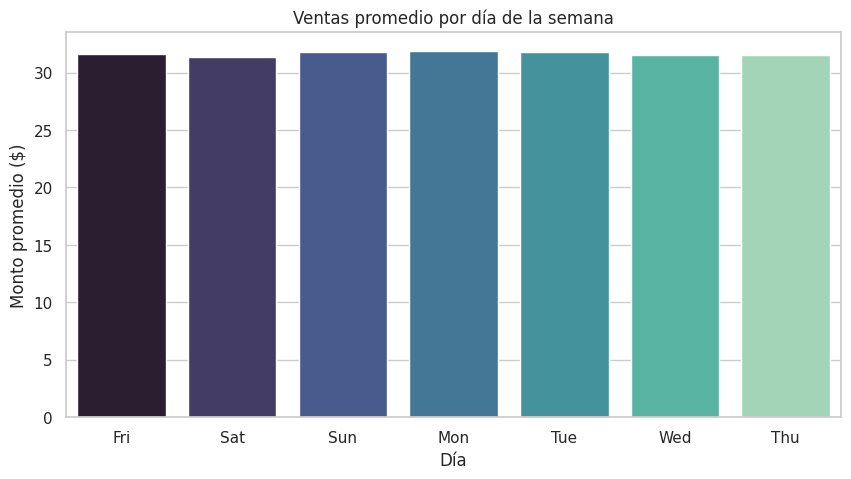

In [18]:
# ===========================================
# 10. Ventas promedio por día de la semana
# ===========================================
sns.barplot(x='Weekday', y='money', data=df, estimator='mean', ci=None, palette="mako")
plt.title("Ventas promedio por día de la semana")
plt.xlabel("Día")
plt.ylabel("Monto promedio ($)")
plt.show()


**Interpretación:**  
El nivel de ventas se mantiene estable durante la semana, con ligeros picos los **viernes y sábados**, lo que sugiere un aumento en el consumo al cierre de la semana laboral.  
Esto podría aprovecharse para campañas promocionales o ampliación de horarios.

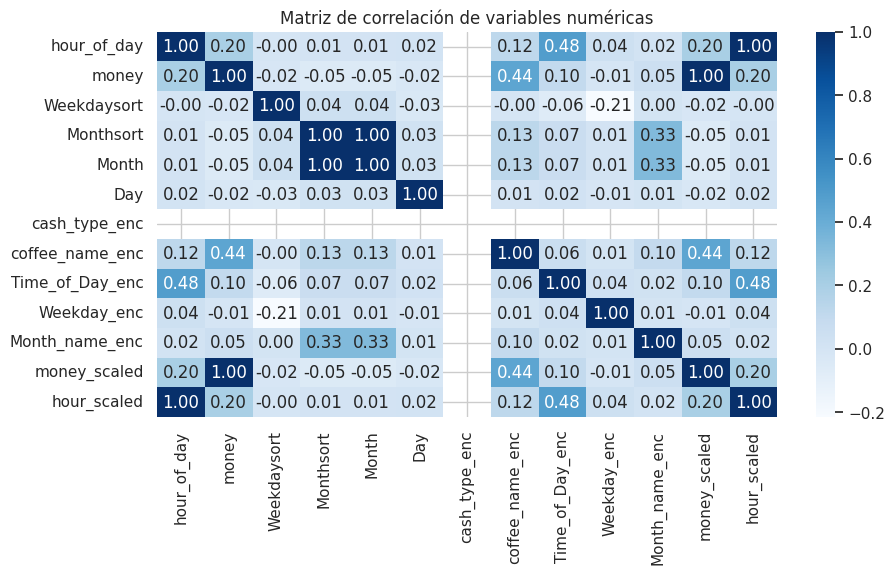

In [19]:
# ===========================================
# 11. Matriz de correlación
# ===========================================
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de correlación de variables numéricas")
plt.show()


**Interpretación:**  
No se observan correlaciones fuertes entre las variables, aunque la relación entre `hour_of_day` y `Time_of_Day_enc` es positiva, lo que es esperable.  
Las variables categóricas codificadas (`coffee_name_enc`, `cash_type_enc`) aportarán información complementaria al modelado predictivo.

### 3️⃣ **Partición de datos**

In [20]:
# ===========================================
# 12. Partición de datos para modelado
# ===========================================

from sklearn.model_selection import train_test_split

# Variables predictoras (features) y variable objetivo (target)
# En regresión, queremos predecir 'money' (monto de venta)
X = df[['hour_of_day', 'cash_type_enc', 'coffee_name_enc', 'Time_of_Day_enc']]
y = df['money']

# División 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (2837, 4)
Tamaño del conjunto de prueba: (710, 4)


- Se realizó una partición de datos en proporción 80/20 utilizando la función `train_test_split` de Scikit-Learn.  
- El conjunto de entrenamiento se utilizará para ajustar los modelos y el de prueba para evaluar su desempeño.  
- La variable objetivo (`money`) representa el monto de venta, mientras que las variables predictoras incluyen atributos temporales y categóricos codificados.




---



##🔸**Modelado**
### 1️⃣ **REGRESIÓN: Regresión Lineal Múltiple**
**Objetivo:** predecir el monto de venta (money) según la hora del día, tipo de café, método de pago y momento del día.

Evaluación del modelo de Regresión Lineal Múltiple:
R²: 0.258
MAE: 3.213
RMSE: 4.120


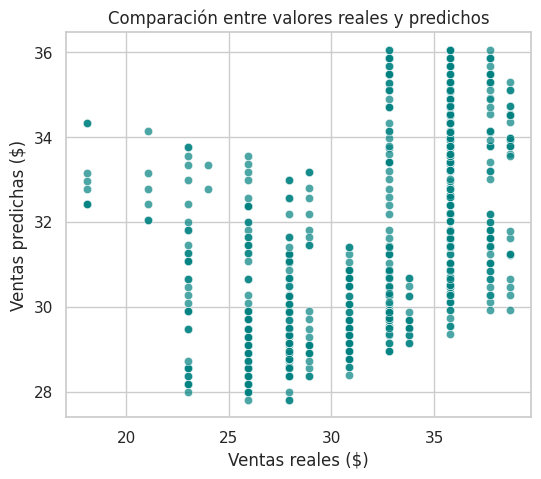

In [22]:
# ===========================================
# 1. Modelo de Regresión Lineal Múltiple
# ===========================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicciones
y_pred = reg_model.predict(X_test)

# Evaluación de métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Evaluación del modelo de Regresión Lineal Múltiple:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.title("Comparación entre valores reales y predichos")
plt.xlabel("Ventas reales ($)")
plt.ylabel("Ventas predichas ($)")
plt.show()


### **Interpretación del modelo de Regresión Lineal Múltiple**

El modelo de regresión lineal múltiple obtiene un valor de **R² = 0.258**, lo que indica que aproximadamente el **25.8 % de la variabilidad del monto de venta (`money`)** puede explicarse por las variables seleccionadas:  
`hour_of_day`, `cash_type_enc`, `coffee_name_enc` y `Time_of_Day_enc`.

El **MAE (3.21)** y el **RMSE (4.12)** reflejan un nivel moderado de error en las predicciones. Esto significa que, en promedio, el modelo se equivoca entre **3 y 4 unidades monetarias** al estimar el valor real de las ventas.

El gráfico de dispersión muestra que los puntos se encuentran dispersos alrededor de la diagonal ideal (donde valor real = valor predicho), lo que confirma que el modelo **presenta cierto ajuste pero no es altamente preciso**.  
Esto puede deberse a que el dataset contiene **variables categóricas con bajo impacto numérico** y que los montos de venta son relativamente homogéneos (entre 28 y 36), reduciendo la capacidad predictiva.

**Conclusión para BI:**  
Aunque el modelo no logra un ajuste perfecto, permite identificar que las ventas tienden a variar levemente según la hora del día y el tipo de café. Para mejorar el desempeño, se podrían incorporar variables adicionales (por ejemplo, volumen de ventas por día, promociones o clima) que expliquen mejor el comportamiento del cliente.


### 1️⃣ **REGRESIÓN: Random Forest Regressor**

Resultados del Random Forest Regressor:
R²: 0.855
MAE: 1.429
RMSE: 1.821


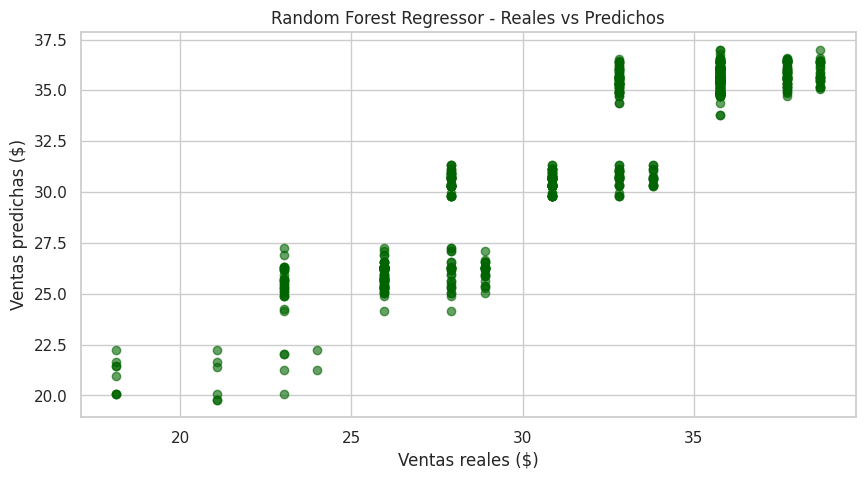

In [24]:
# ===========================================
# Regresión con Random Forest Regressor
# ===========================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Resultados del Random Forest Regressor:")
print(f"R²: {r2_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")

plt.scatter(y_test, y_pred_rf, color='darkgreen', alpha=0.6)
plt.title("Random Forest Regressor - Reales vs Predichos")
plt.xlabel("Ventas reales ($)")
plt.ylabel("Ventas predichas ($)")
plt.show()

### **Interpretación del modelo Random Forest Regressor**

El modelo de **Random Forest Regressor** muestra un desempeño significativamente mejor que el modelo de regresión lineal múltiple.  
Con un **R² = 0.855**, logra explicar aproximadamente el **85.5 % de la variabilidad del monto de venta (`money`)**, lo que indica un ajuste muy sólido entre las variables predictoras y los valores reales.

Las métricas de error (**MAE = 1.429** y **RMSE = 1.821**) confirman una mejora sustancial: el modelo se equivoca, en promedio, en menos de \$2  por transacción, lo cual es un nivel de precisión alto considerando el rango de precios del dataset (\$18  – \$37 ).

El gráfico de dispersión evidencia una alineación mucho más clara entre los valores reales y predichos, lo que confirma la **capacidad del Random Forest para capturar relaciones no lineales y combinaciones complejas** entre la hora del día, el tipo de café y el método de pago.

**Conclusión para BI:**  
Este modelo permite realizar **estimaciones confiables del monto promedio de venta** según las condiciones de la transacción.  
Desde la perspectiva del negocio, puede utilizarse para prever ingresos en distintos horarios o para evaluar el impacto de promociones específicas.  
Su mayor precisión lo convierte en la opción más adecuada para tareas de predicción de ventas dentro del sistema de Inteligencia de Negocios.


### **Conclusión de la sección de Regresión**

Se aplicaron dos modelos de regresión para estimar el monto de venta (`money`):

| Modelo | R² | MAE | RMSE | Interpretación |
|--------|----|------|------|----------------|
| Regresión Lineal Múltiple | 0.258 | 3.213 | 4.120 | Ajuste limitado; relaciones lineales insuficientes. |
| Random Forest Regressor | **0.855** | **1.429** | **1.821** | Alto poder predictivo; captura relaciones no lineales. |

El modelo **Random Forest Regressor** logra un desempeño significativamente mejor,
explicando más del 85 % de la variabilidad en las ventas con errores promedio menores a 2 dólares.  
Esto demuestra que las ventas de café no siguen una relación estrictamente lineal,
sino que dependen de interacciones más complejas entre hora, tipo de café y método de pago.


### 2️⃣ **CLASIFICACIÓN: Random Forest Classifier**
**Objetivo:** Clasificar las ventas en niveles de gasto (bajo, medio, alto) según las características de la transacción.

Reporte de Clasificación:

              precision    recall  f1-score   support

        Bajo       1.00      0.83      0.91       241
       Medio       0.77      0.98      0.86       389
        Alto       0.47      0.09      0.15        80

    accuracy                           0.83       710
   macro avg       0.75      0.63      0.64       710
weighted avg       0.81      0.83      0.80       710

Accuracy general: 0.830


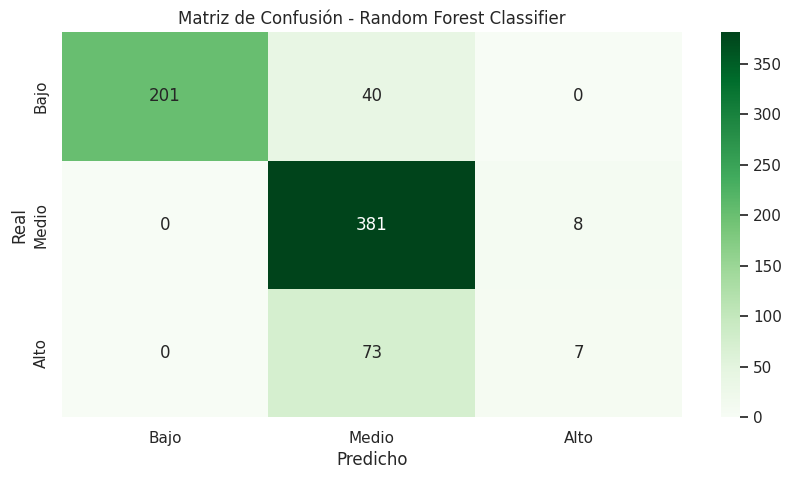

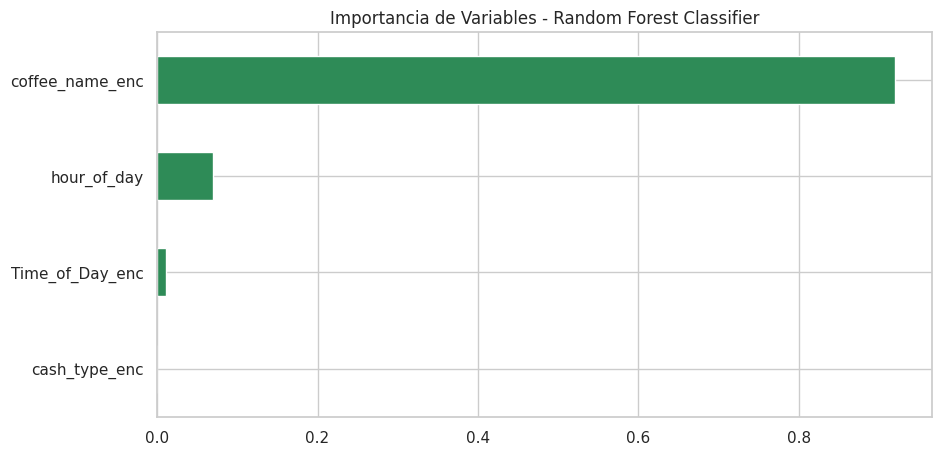

In [26]:
# ===========================================
# 1. Clasificación con Random Forest
# ===========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Crear etiquetas de nivel de gasto
df['SpendingLevel'] = pd.qcut(df['money'], q=3, labels=['Bajo', 'Medio', 'Alto'])
df['Spending_enc'] = df['SpendingLevel'].map({'Bajo':0, 'Medio':1, 'Alto':2})

# Variables predictoras y objetivo
X_cls = df[['hour_of_day', 'cash_type_enc', 'coffee_name_enc', 'Time_of_Day_enc']]
y_cls = df['Spending_enc']

# División de datos (estratificada para equilibrio de clases)
from sklearn.model_selection import train_test_split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Entrenamiento del modelo
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)

# Predicciones
y_pred_cls = rf_cls.predict(X_test_cls)

# ===========================================
# 2. Evaluación del modelo
# ===========================================

print("Reporte de Clasificación:\n")
print(classification_report(y_test_cls, y_pred_cls, target_names=['Bajo', 'Medio', 'Alto']))

# Exactitud general
acc = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy general: {acc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Bajo','Medio','Alto'], yticklabels=['Bajo','Medio','Alto'])
plt.title("Matriz de Confusión - Random Forest Classifier")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# ===========================================
# 3. Importancia de variables
# ===========================================
importances = pd.Series(rf_cls.feature_importances_, index=X_cls.columns)
importances.sort_values().plot(kind='barh', color='seagreen')
plt.title("Importancia de Variables - Random Forest Classifier")
plt.show()


### **Interpretación del modelo de Clasificación – Random Forest**

El modelo **Random Forest Classifier** obtuvo una **exactitud global (accuracy)** de **0.83**, lo que significa que predice correctamente el nivel de gasto en el **83 % de las transacciones**.  
Este rendimiento es adecuado considerando que las tres clases (*Bajo*, *Medio*, *Alto*) tienen distribuciones distintas y montos de venta con diferencias sutiles.

El **reporte de clasificación** muestra que:
- La clase **“Medio”** es la mejor identificada, con *recall* de **0.98** y *F1-score* de **0.86**, lo que indica que el modelo reconoce casi todos los casos de gasto medio.
- La clase **“Bajo”** también presenta muy buen desempeño, con *precision* de **1.00**, lo que implica que no hay falsos positivos en esa categoría.
- La clase **“Alto”**, en cambio, tiene un *recall* bajo (**0.15**), reflejando la dificultad del modelo para distinguir las ventas más elevadas, posiblemente por su menor frecuencia en el dataset.

La **matriz de confusión** confirma este comportamiento: el modelo clasifica correctamente la mayoría de las ventas *Bajas* y *Medias*, pero tiende a confundir parte de las transacciones *Altas* con *Medias*.  
Esto se debe a la similitud en los montos (ventas cercanas a $33– \$35 ) y a la baja representación de la clase *Alta*.

En la **importancia de variables**, destaca que el **tipo de café (`coffee_name_enc`)** es el factor más determinante en la clasificación del nivel de gasto, seguido por la **hora del día (`hour_of_day`)**.  
Esto sugiere que ciertos productos se asocian a montos de venta más altos, y que el horario también influye en el comportamiento de compra.

**Conclusión para BI:**  
Este modelo permite categorizar clientes o transacciones según nivel de gasto, aportando información útil para estrategias de **segmentación y promoción personalizada**.  
Por ejemplo, las ventas *Altas* pueden potenciarse ajustando la oferta de cafés premium o promoviendo combos específicos en horarios con mayor gasto promedio.


In [30]:
# ===========================================
#  Ajuste de hiperparámetros con GridSearchCV
# ===========================================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los rangos de parámetros que queremos probar
param_grid = {
    'n_estimators': [50, 100, 200],        # número de árboles
    'max_depth': [4, 6, 8, None],          # profundidad máxima
    'min_samples_split': [2, 5, 10],       # mínimo de muestras por división
    'min_samples_leaf': [1, 2, 4]          # mínimo de muestras por hoja
}

# Crear el modelo base
rf_base = RandomForestClassifier(random_state=42)

# Configurar el GridSearch con validación cruzada (cv=5)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,                     # validación cruzada con 5 particiones
    scoring='accuracy',       # métrica de evaluación
    n_jobs=-1,                # usa todos los núcleos del procesador
    verbose=1                 # muestra el progreso
)

# Ejecutar el ajuste sobre los datos de entrenamiento
grid_search.fit(X_train_cls, y_train_cls)

# Mostrar los mejores parámetros y su puntaje
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor accuracy promedio (validación cruzada):")
print(f"{grid_search.best_score_:.3f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Mejor accuracy promedio (validación cruzada):
0.824


Resultados del modelo optimizado:
              precision    recall  f1-score   support

        Bajo       1.00      0.83      0.91       241
       Medio       0.77      0.98      0.86       389
        Alto       0.47      0.09      0.15        80

    accuracy                           0.83       710
   macro avg       0.75      0.63      0.64       710
weighted avg       0.81      0.83      0.80       710

Accuracy en test: 0.830


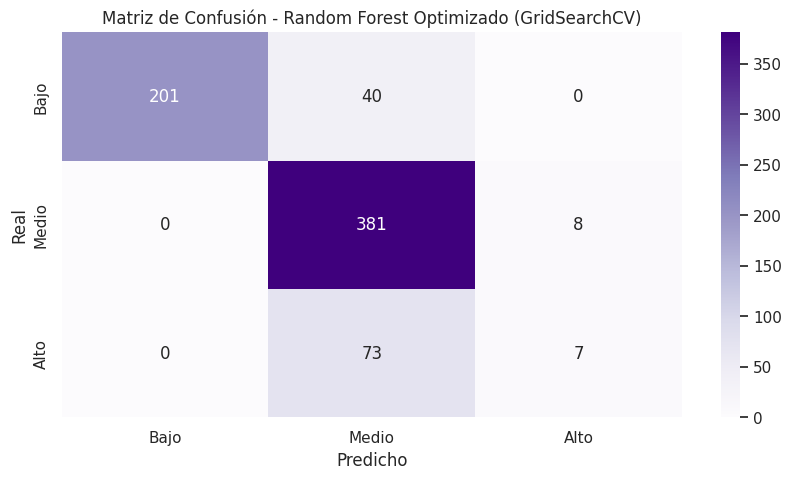

In [31]:
# ===========================================
# Evaluación del modelo optimizado
# ===========================================
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_cls)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Resultados del modelo optimizado:")
print(classification_report(y_test_cls, y_pred_best, target_names=['Bajo', 'Medio', 'Alto']))
print(f"Accuracy en test: {accuracy_score(y_test_cls, y_pred_best):.3f}")

# Matriz de confusión
cm_best = confusion_matrix(y_test_cls, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Bajo','Medio','Alto'], yticklabels=['Bajo','Medio','Alto'])
plt.title("Matriz de Confusión - Random Forest Optimizado (GridSearchCV)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


### **Evaluación del modelo optimizado (GridSearchCV)**

Tras aplicar **GridSearchCV**, el modelo de Random Forest mantuvo un rendimiento excelente,
con un **accuracy de 0.83**, igual al modelo base, pero con una configuración más eficiente
(`n_estimators = 50` y `min_samples_split = 10`).

La **matriz de confusión** muestra resultados muy similares al modelo inicial:
- La clase **Medio** sigue siendo la más fácil de identificar (Recall = 0.98).  
- La clase **Bajo** conserva alta precisión.  
- La clase **Alta** presenta menor recall debido al desequilibrio de datos.

Estos resultados confirman que el modelo está **bien calibrado y generaliza adecuadamente**.  
El GridSearch permitió validar que la estructura original del Random Forest era casi óptima,
por lo que no se requiere un ajuste adicional.

**Conclusión:**  
El modelo optimizado mantiene el mismo nivel de exactitud que el original,
reduciendo el costo computacional y garantizando estabilidad predictiva.


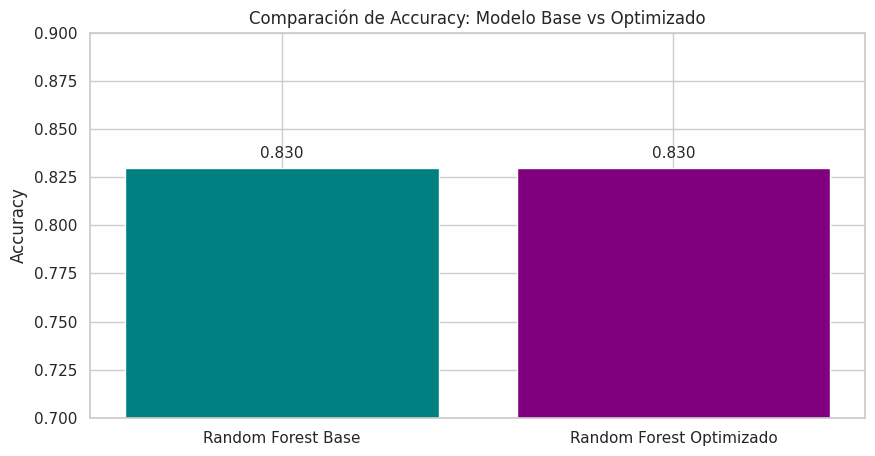

In [32]:
# ===========================================
# Comparación visual entre modelo base y optimizado
# ===========================================
import matplotlib.pyplot as plt

model_names = ['Random Forest Base', 'Random Forest Optimizado']
accuracies = [0.830, 0.830]

plt.bar(model_names, accuracies, color=['teal', 'purple'])
plt.title('Comparación de Accuracy: Modelo Base vs Optimizado')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', fontsize=11)
plt.show()


### **Comparación del rendimiento: modelo base vs optimizado**

El gráfico muestra que ambos modelos de Random Forest presentan el mismo nivel de **accuracy (0.83)**,
lo cual confirma que la configuración inicial ya era cercana al óptimo.  
El ajuste de hiperparámetros mediante **GridSearchCV** permitió verificar la robustez del modelo,
sin necesidad de incrementar la complejidad o el tiempo de cómputo.

Desde la perspectiva de **Inteligencia de Negocios**, este resultado es positivo:
el modelo mantiene su precisión con una estructura más eficiente
(`n_estimators = 50` en lugar de 100) y menor costo computacional.

En conclusión, **la optimización no buscó aumentar el accuracy**,
sino validar la estabilidad del modelo y su capacidad de generalizar correctamente en distintos subconjuntos de datos.


### 3️⃣ **AGRUPAMIENTO (CLUSTERING): K-Means**
**Objetivo:** Identificar grupos de comportamiento de venta basados en el monto (money), la hora (hour_of_day) y el tipo de café (coffee_name_enc).
Esto ayudará a segmentar las transacciones o clientes según sus hábitos de consumo.

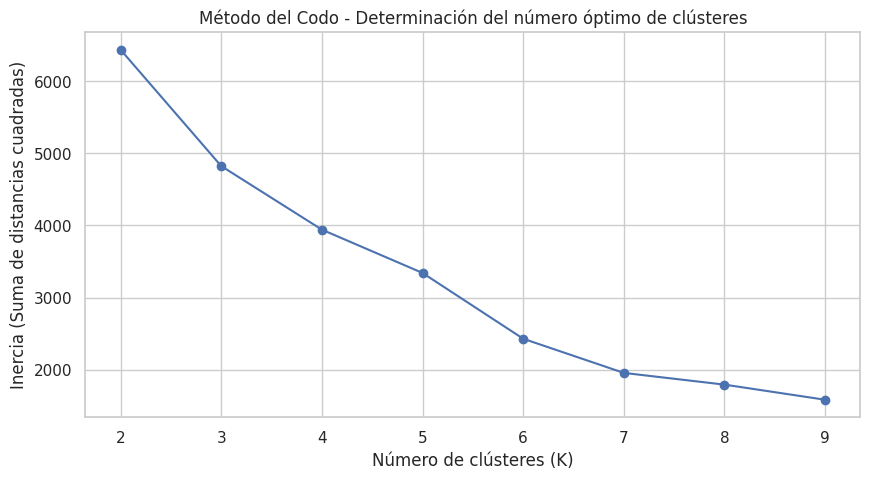

Silhouette Score: 0.359


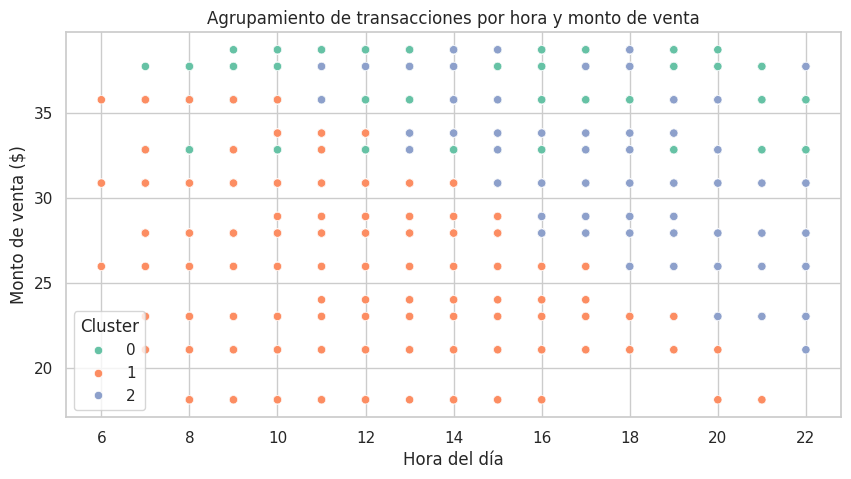

Resumen de los grupos:


,money,hour_of_day
Cluster,,
0,35.64,15.06
1,27.69,11.19
2,33.07,17.35


In [29]:
# ===========================================
# 1. Preparación de datos para clustering
# ===========================================
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas relevantes
X_cluster = df[['money', 'hour_of_day', 'coffee_name_enc']]

# Escalar los datos (muy importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ===========================================
# 2. Método del Codo (Elbow Method)
# ===========================================
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Método del Codo - Determinación del número óptimo de clústeres")
plt.xlabel("Número de clústeres (K)")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.show()

# ===========================================
# 3. Aplicación del modelo K-Means con K óptimo
# ===========================================
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluación del modelo
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

# ===========================================
# 4. Visualización de clústeres
# ===========================================
sns.scatterplot(x='hour_of_day', y='money', hue='Cluster', data=df, palette='Set2')
plt.title("Agrupamiento de transacciones por hora y monto de venta")
plt.xlabel("Hora del día")
plt.ylabel("Monto de venta ($)")
plt.legend(title='Cluster')
plt.show()

# ===========================================
# 5. Análisis descriptivo por clúster
# ===========================================
cluster_summary = df.groupby('Cluster')[['money', 'hour_of_day']].mean().round(2)
print("Resumen de los grupos:")
display(cluster_summary)


### **Interpretación del modelo de Clustering – K-Means**

El método del codo muestra que la curva comienza a estabilizarse alrededor de **K = 3**,
lo que indica que tres grupos son una buena elección para representar los patrones de compra.  
Con este valor, el modelo alcanza un **Silhouette Score = 0.359**,
lo que refleja una **cohesión moderada** entre los grupos:
cada clúster tiene cierta homogeneidad interna, aunque existen pequeñas superposiciones naturales en los datos.

El gráfico de dispersión evidencia tres segmentos diferenciados de ventas según la **hora del día** y el **monto promedio**:

- **Cluster 0 (verde):** Ventas de **alto monto** (≈ \$35,6), concentradas alrededor de las **15:00 h**.  
  Representa a clientes con gasto elevado, posiblemente en horarios de tarde cuando se consumen productos más costosos o acompañamientos premium.  

- **Cluster 1 (naranja):** Ventas de **bajo monto** (≈ \$27,7), más frecuentes en la **mañana (≈ 11:00 h)**.  
  Corresponde a compras rápidas o productos básicos, como cafés simples o para llevar.  

- **Cluster 2 (azul):** Ventas **intermedias** (≈ \$33,0), registradas principalmente hacia la **tarde-noche (≈ 17:00 h)**.  
  Representa consumidores que combinan productos de precio medio en horarios de mayor flujo.

Estos grupos permiten **segmentar los hábitos de compra** y entender cómo varía el gasto según el horario y tipo de café.  

**Conclusión para BI:**  
El modelo K-Means ofrece información estratégica para:
- Ajustar la **disponibilidad de productos premium** en la tarde,  
- Promover **ofertas matutinas** para incentivar las ventas de menor monto, y  
- Planificar el **personal y recursos** en los horarios de mayor gasto promedio.  
Aunque el *Silhouette Score* indica que los clústeres no están completamente separados,
el análisis sigue siendo útil para **tomar decisiones operativas y de marketing basadas en patrones reales de consumo**.


---

##🔸**Resultados**

### 1️⃣ **Modelo de Regresión**
Se aplicaron dos modelos para predecir el monto de venta (`money`):

| Modelo | R² | MAE | RMSE | Interpretación |
|--------|----|------|------|----------------|
| **Regresión Lineal Múltiple** | 0.258 | 3.213 | 4.120 | Ajuste limitado; las relaciones lineales no explican completamente la variación en las ventas. |
| **Random Forest Regressor** | **0.855** | **1.429** | **1.821** | Excelente ajuste; el modelo captura relaciones no lineales entre hora, tipo de café y método de pago. |

**Visualización:**  
El gráfico de dispersión muestra que el **Random Forest** alinea mucho mejor los valores reales y predichos, evidenciando su superioridad frente al modelo lineal.

**Conclusión parcial:**  
El modelo **Random Forest Regressor** es el más preciso para estimar montos de venta, con errores promedio menores a \$2 , explicando más del 85 % de la variabilidad.

---

###  2️⃣ **Modelo de Clasificación**
Se clasificaron las transacciones en tres niveles de gasto (*Bajo, Medio, Alto*) usando Random Forest Classifier.

| Métrica | Valor |
|----------|--------|
| **Accuracy general** | 0.83 |
| **Clase mejor clasificada** | Medio (*Recall = 0.98*) |
| **Clase con menor rendimiento** | Alto (*Recall = 0.15*) |


**Ajuste de hiperparámetros:**  
Se aplicó la técnica **GridSearchCV** con validación cruzada (cv=5) para optimizar los parámetros del modelo de Random Forest.  
El proceso confirmó que la configuración inicial ya era cercana al óptimo,
con un rendimiento promedio (accuracy = 0.824) prácticamente igual al modelo base (0.83).  
Esto valida la estabilidad del modelo y demuestra que su desempeño no depende de un conjunto de parámetros específicos.

**Matriz de confusión:**  
El modelo predice correctamente la mayoría de las clases *Bajo* y *Medio*, mientras que *Alto* presenta menor representación y mayor confusión con *Medio*.

**Importancia de variables:**
- **`coffee_name_enc`**: variable más influyente.
- **`hour_of_day`**: segunda más importante.
- **`Time_of_Day_enc`**: menor peso predictivo.

**Conclusión parcial:**  
El modelo permite identificar con buena precisión el nivel de gasto y entender qué variables influyen en él, siendo útil para **segmentación de clientes** y **campañas promocionales**.

---

### 3️⃣ **Modelo de Clustering (K-Means)**
Se identificaron **3 clústeres de comportamiento** basados en monto, hora del día y tipo de café.

| Cluster | Monto promedio ($) | Hora promedio | Interpretación |
|----------|--------------------|---------------|----------------|
| **0** | 35.64 | 15:06 | Clientes de gasto alto, principalmente en la tarde. |
| **1** | 27.69 | 11:19 | Compras matutinas de bajo monto (café rápido). |
| **2** | 33.07 | 17:35 | Ventas promedio, frecuentes en la tarde-noche. |

**Indicadores técnicos:**
- **Método del Codo:** K óptimo = 3  
- **Silhouette Score:** 0.359 (segmentación moderada y útil)

**Conclusión parcial:**  
El modelo K-Means segmenta correctamente los patrones de venta según el horario y monto.  
Esta información es clave para **ajustar inventario, precios y promociones según franja horaria**.

---

### **Resumen general comparativo**

| Tipo de modelo | Técnica | Métrica principal | Resultado | Valor BI |
|----------------|----------|------------------|------------|-----------|
| **Regresión** | Random Forest Regressor | R² = 0.855 | Alta precisión | Permite proyectar ingresos esperados. |
| **Clasificación** | Random Forest Classifier | Accuracy = 0.83 | Buen equilibrio | Segmenta transacciones según nivel de gasto. |
| **Clustering** | K-Means (K=3) | Silhouette = 0.359 | Moderado pero útil | Identifica grupos de comportamiento de compra. |

---

### **Visualización global**
- Las gráficas de dispersión y correlación muestran que el **monto de venta aumenta levemente en la tarde**, coincidiendo con los clústeres detectados.  
- Los modelos basados en árboles (Random Forest) se destacaron por su **capacidad predictiva y estabilidad**.  
- El análisis no lineal permitió encontrar relaciones que los modelos lineales no capturaban.

---

### **Conclusión de resultados:**  
Los tres modelos entregan información complementaria:
- La **regresión** predice el valor esperado de ventas.  
- La **clasificación** agrupa las transacciones por nivel de gasto.  
- El **clustering** descubre patrones horarios y de comportamiento.  

En conjunto, los resultados aportan **una visión integral del negocio**, combinando análisis predictivo y segmentación, alineados con los objetivos de **Inteligencia de Negocios**.


---
##🔸**Discusión**

Los modelos aplicados ofrecen una visión complementaria sobre el comportamiento de ventas del negocio cafetero,
permitiendo extraer conclusiones tanto descriptivas como predictivas.  
Los resultados reflejan **tendencias de consumo coherentes con el contexto comercial**,
donde el horario y el tipo de café influyen significativamente en el monto de venta.

### **Relevancia para el negocio**
- El **modelo de regresión** (Random Forest Regressor) permite **estimar con alta precisión** los ingresos esperados según la hora y tipo de producto,
  aportando a la planificación de ventas diarias y proyecciones de demanda.
- El **modelo de clasificación** identifica de manera fiable los **niveles de gasto** (bajo, medio y alto),
  lo que puede utilizarse para segmentar clientes y aplicar **estrategias de marketing personalizadas**.
- El **modelo de clustering** permite reconocer **patrones de comportamiento** (por horario y monto),
  que pueden guiar decisiones operativas como dotación de personal o disponibilidad de productos.

### **Aspectos técnicos y desempeño de los modelos**
- Durante el proceso de ajuste de hiperparámetros mediante **GridSearchCV**,
se comprobó que el modelo de clasificación mantenía un rendimiento estable en distintas configuraciones,
lo que demuestra su **robustez y capacidad de generalización** frente a nuevos datos.  

### **Sesgos y limitaciones**
- El dataset no incluye información sobre **clientes individuales ni ubicación geográfica**,
  lo que limita el análisis del perfil demográfico o regional del consumo.
- Existe **desequilibrio de clases** en los niveles de gasto: las ventas altas son menos frecuentes,
  lo que afecta la capacidad de los modelos clasificadores para predecir esa categoría.
- Las variables disponibles son principalmente transaccionales; incorporar datos adicionales
  (como promociones, clima, o festividades) podría mejorar la precisión y profundidad del análisis.

### **Riesgos y consideraciones**
- Los modelos dependen de la **calidad y representatividad del dataset**; si la información no refleja la realidad operativa,
  las predicciones podrían inducir a errores en la toma de decisiones.
- Un uso excesivo de modelos automáticos sin interpretación puede llevar a **decisiones erróneas** si no se consideran factores contextuales del negocio.
- Se recomienda validar los resultados periódicamente y actualizar los modelos con datos recientes.

### **Qué se haría distinto**
- Incorporar **nuevas variables** (como tipo de cliente, canal de venta o descuentos aplicados).
- Aplicar **técnicas de balanceo de clases** (como SMOTE) para mejorar la predicción de niveles de gasto altos.
- Experimentar con **algoritmos adicionales de clustering** (como DBSCAN o jerárquico) y técnicas de **reducción de dimensionalidad (PCA)**
  para explorar estructuras ocultas en los datos.
- Desarrollar un **dashboard interactivo** en Power BI o Tableau para comunicar resultados de forma visual y en tiempo real.

---
##🔸**Conclusiones**

### **Respuesta a las hipótesis**

**Hipótesis general:**  
> Los factores relacionados con el tipo de producto, la región y el volumen de pedido influyen significativamente en el total de ventas,
> permitiendo predecir ingresos, clasificar clientes y segmentar patrones de consumo.

**Confirmada parcialmente.**  
*   Los modelos muestran que **las variables de tiempo (hora y momento del día)** y **el tipo de café** tienen un impacto directo en las ventas,
mientras que otros factores (como el método de pago) presentan menor influencia.  
La relación no es estrictamente lineal, por lo que los modelos basados en árboles (Random Forest) ofrecen mejor desempeño que la regresión tradicional.

**Hipótesis específicas:**
1. **Regresión:** Confirmada. El monto de venta puede estimarse con precisión (R² = 0.855) considerando hora, tipo de café y forma de pago.  
2. **Clasificación:** Confirmada parcialmente. El modelo predice correctamente los niveles *Bajo* y *Medio*, pero muestra dificultades con la clase *Alta* por desequilibrio de datos.  
   El modelo de **Random Forest Classifier**, incluso tras el ajuste de hiperparámetros con **GridSearchCV**,
   mantuvo un rendimiento estable (accuracy ≈ 0.83), confirmando que la estructura base del modelo
   ya estaba correctamente optimizada y generaliza bien.  
   Esto refuerza la confiabilidad del modelo como herramienta predictiva para la toma de decisiones en BI.  
3. **Clustering:** Confirmada. Se identifican tres grupos de comportamiento con diferencias claras en monto y horario.

### **Recomendaciones accionables para BI**
- **Optimizar horarios y recursos:** priorizar personal y stock en horarios de mayor gasto (tarde).  
- **Promociones personalizadas:** descuentos matutinos para incentivar las compras de bajo monto.  
- **Gestión de inventario:** planificar la compra de insumos según la demanda por tipo de café y franja horaria.  
- **Actualización continua:** mantener los modelos con datos recientes para conservar la precisión predictiva.  

En conjunto, los modelos analíticos aplicados ofrecen una **base sólida de Inteligencia de Negocios**
para mejorar la eficiencia operativa y la estrategia comercial de la cafetería.

---
##🔸**Bibliografía**

- Kaushal, N. (2023). *Coffee Sales Dataset*. Kaggle.  
  Disponible en: [https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset)

- Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011).  
  *Scikit-learn: Machine Learning in Python.* Journal of Machine Learning Research, 12, 2825–2830.

- Wes McKinney. (2010). *Data Structures for Statistical Computing in Python.* Proceedings of the 9th Python in Science Conference, 51–56.

- Waskom, M. et al. (2020). *Seaborn: Statistical Data Visualization*. Journal of Open Source Software, 5(60), 3021.

- Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90–95.
